In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_train_path="F:\\datasets\\Fruits_Vegetables\\Fruits_Vegetables\\train"
data_test_path="F:\\datasets\\Fruits_Vegetables\\Fruits_Vegetables\\test"
data_val_path="F:\\datasets\\Fruits_Vegetables\\Fruits_Vegetables\\validation"

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [5]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [7]:
data_ct = data_train.class_names
data_ct

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

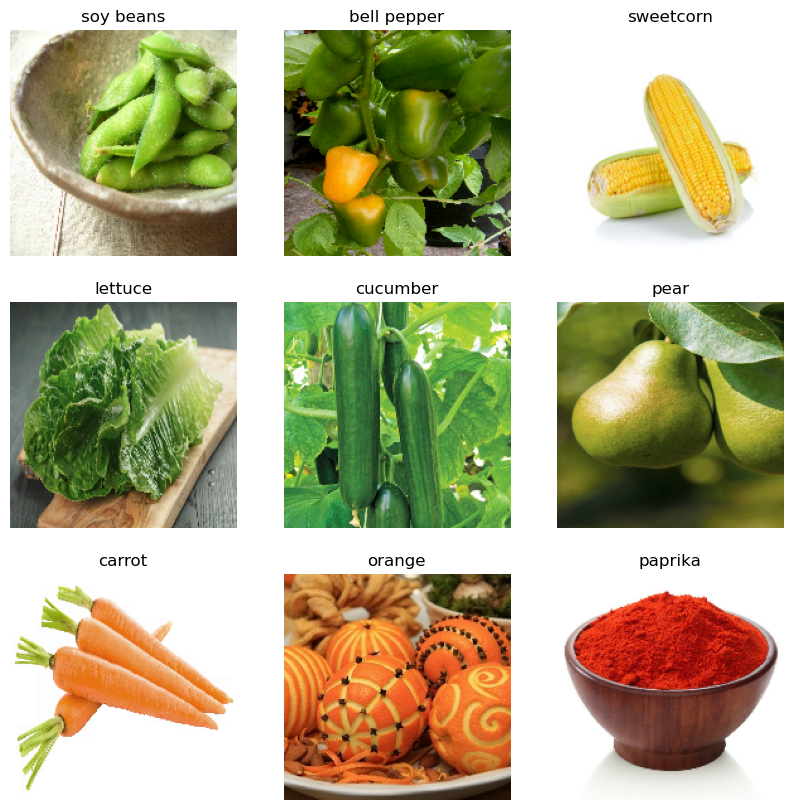

In [8]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_ct[labels[i]])
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
data_train    

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_ct))])

In [12]:
#compiling
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [13]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25


98/98 [==============================] - 56s 512ms/step - loss: 3.5351 - accuracy: 0.0764 - val_loss: 2.7805 - val_accuracy: 0.2450
Epoch 2/25
98/98 [==============================] - 55s 532ms/step - loss: 2.7202 - accuracy: 0.2343 - val_loss: 1.9609 - val_accuracy: 0.5100
Epoch 3/25
98/98 [==============================] - 55s 524ms/step - loss: 2.1396 - accuracy: 0.3849 - val_loss: 1.2320 - val_accuracy: 0.6809
Epoch 4/25
98/98 [==============================] - 53s 509ms/step - loss: 1.5527 - accuracy: 0.5531 - val_loss: 0.8271 - val_accuracy: 0.8091
Epoch 5/25
98/98 [==============================] - 53s 509ms/step - loss: 0.9794 - accuracy: 0.7217 - val_loss: 0.6413 - val_accuracy: 0.8547
Epoch 6/25
98/98 [==============================] - 56s 539ms/step - loss: 0.6180 - accuracy: 0.8154 - val_loss: 0.6188 - val_accuracy: 0.8718
Epoch 7/25
98/98 [==============================] - 55s 524ms/step - loss: 0.4114 - accuracy: 0.8857 - val_loss: 0.5823 - val_accuracy: 0.91

Text(0.5, 1.0, 'Loss')

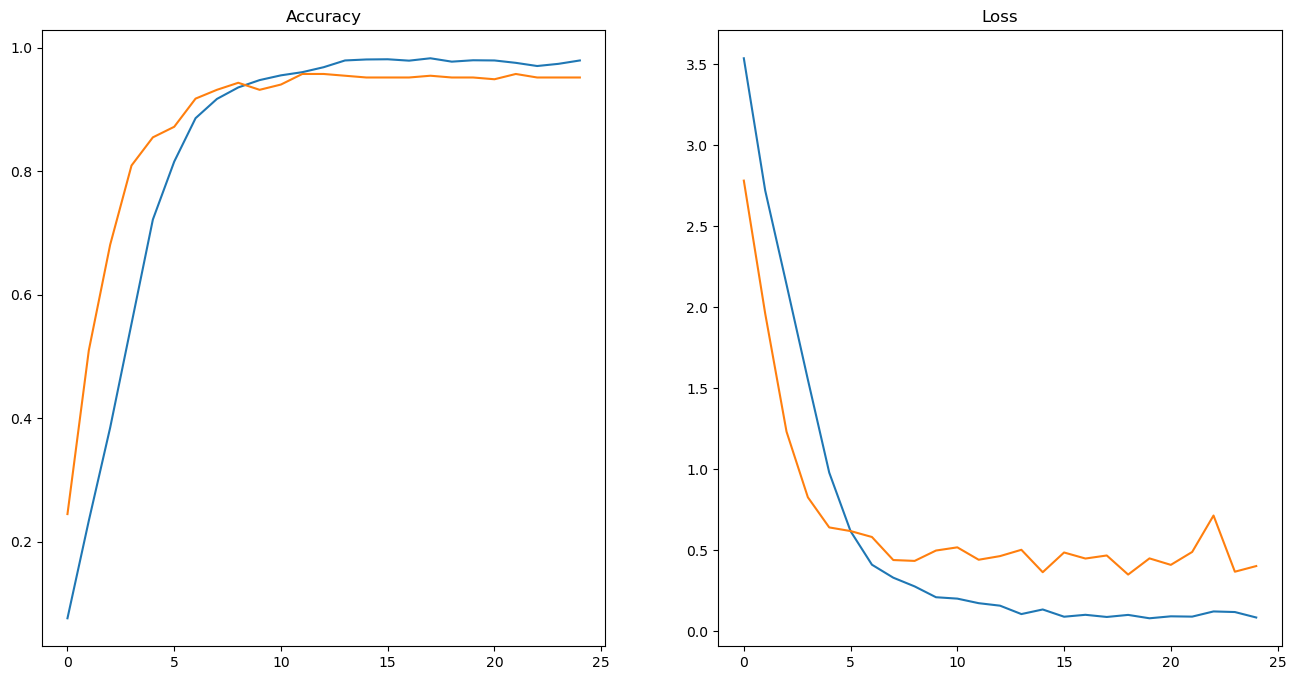

In [14]:
epochs_range = range(epochs_size)
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

#### single prediction

In [15]:
image ="F:\\datasets\\images.jpeg"
image = tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_b=tf.expand_dims(img_arr,0)

In [16]:
pred = model.predict(img_b)

1/1 [==============================] - 0s 234ms/step


In [17]:
score = tf.nn.softmax(pred)

In [19]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_ct[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is lemon with accuracy of 89.11


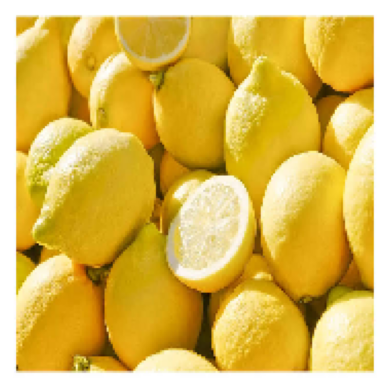

In [20]:
plt.imshow(image)
plt.axis('off')
plt.show()